Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.9175 - loss: 0.2708 - val_accuracy: 0.9828 - val_loss: 0.0608
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9710 - loss: 0.0974 - val_accuracy: 0.9872 - val_loss: 0.0476
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9785 - loss: 0.0698 - val_accuracy: 0.9865 - val_loss: 0.0477
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9833 - loss: 0.0564 - val_accuracy: 0.9908 - val_loss: 0.0351
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.9844 - loss: 0.0495 - val_accuracy: 0.9913 - val_loss: 0.0319
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9914 - loss: 0.0290
✅ Test Accuracy: 0.9914


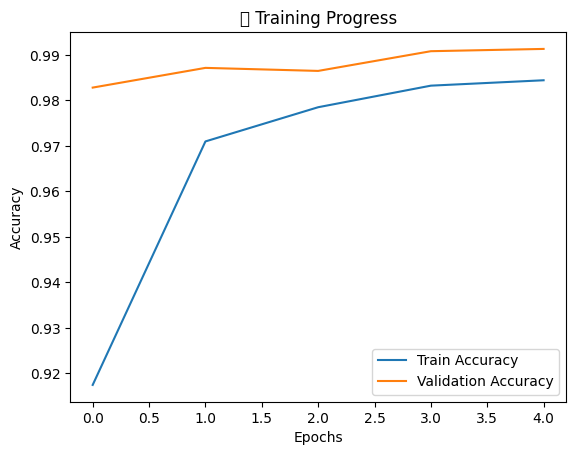

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


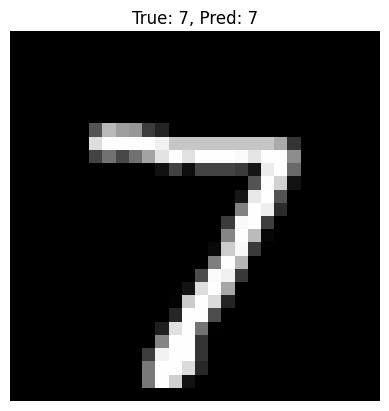

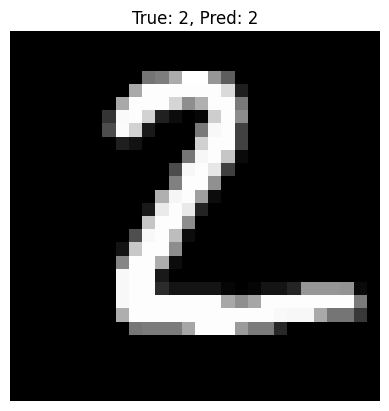

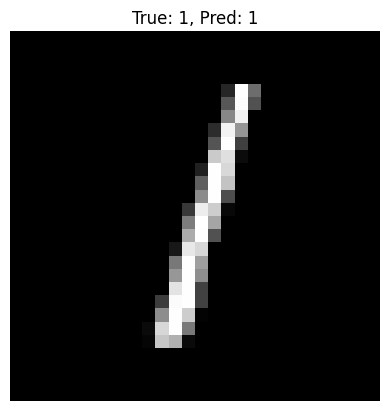

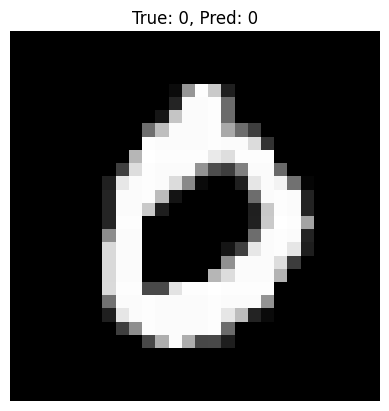

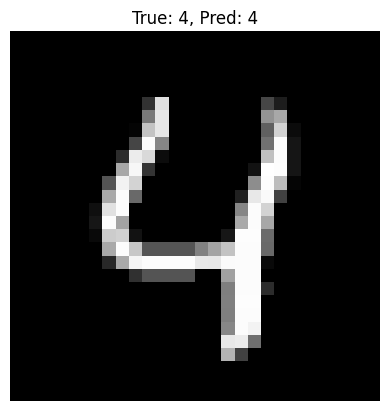

✅ Model saved as mnist_model.h5


In [2]:
# AI Toolkit Project: Handwritten Digit Recognition using TensorFlow
# Objective: Build a CNN on MNIST dataset to classify digits (0-9)
# Target Accuracy: >95%
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add channel dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Build CNN Architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_split=0.1, verbose=1)

# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")

# Accuracy Graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('📈 Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualize Predictions
predictions = model.predict(x_test)
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()
model.save("mnist_model.h5")
print("✅ Model saved as mnist_model.h5")
